In [230]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [231]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [232]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [233]:
test.shape, train.shape

((3263, 4), (7613, 5))

In [234]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [235]:
train = train.drop(["location"], axis = 1)
train.fillna(train.median(), inplace = True)
train = train.drop(["keyword"], axis = 1)

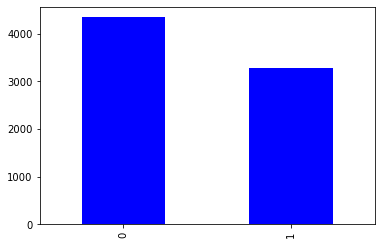

In [236]:
train.target.value_counts().plot(kind = "bar", color = "blue")
plt.show()

In [237]:
train = train.rename(columns = {"text": "txt"})
test = test.rename(columns = {"text": "txt"})
stop = stopwords.words("english")
stemmer = nltk.SnowballStemmer("english")

def cleantxt(txt):
    txt = str(txt).lower()
    txt = re.sub(r'[^A-Za-z0-9\s]+','',txt)
    txt = re.sub(r'@\s+|http\s+|www.\s+|\n','',txt)
    txt = [stemmer.stem(word) for word in txt.split(" ")]
    txt = " ".join([word for word in txt if word not in stop])
    txt = txt.strip()
    return txt


test["txt"] = test["txt"].apply(cleantxt)
train["txt"] = train["txt"].apply(cleantxt)

In [238]:
test = test.drop({"keyword","location"}, axis = 1)
train1 = train['txt'] 
train2 = train['target']
test1 = test['txt']

In [239]:
algo = make_pipeline(TfidfVectorizer(ngram_range = (1, 2)), MultinomialNB(alpha = 1.0))
algo.fit(train1, train2)
out = algo.predict(test1)
out

array([1, 0, 1, ..., 1, 1, 1])

In [241]:
submit = pd.read_csv("sample_submission.csv")
submit["target"] = out
submit.head(10)

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [244]:
submit.to_csv("submission.csv", index = False)